**Importing the Required Libraries**

In [19]:
# Importing the required libraries
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, StratifiedKFold, TimeSeriesSplit

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Analyzing the Original Dataset**

In [20]:
class Youtube_Comments_Analyzer:
  def __init__(self, df):
    self.df = df

  # Printing the first 5 elements in the DataFrame
  def print_dataframe_head(self, version):
    print(f"\nThe first 5 element of the {version} DataFrame are as follows:")
    display(HTML(self.df.head().to_html()))

  # Printing the last 5 elements in the DataFrame
  def print_dataframe_tail(self, version):
    print(f"\nThe last 5 element of the {version} DataFrame are as follows:")
    display(HTML(self.df.tail().to_html()))

  # Printing the concise summary of the DataFrame
  def print_dataframe_info(self, version):
    print(f"\nThe concise summary of the {version} DataFrame is as follows:")
    print(self.df.info())

  # Printing the dimensions of the DataFrame
  def print_dataframe_shape(self, version):
    print(f"\nThe dimensions of the {version} DataFrame are as follows:")
    print(self.df.shape)

  # Printing the columns present in the DataFrame and their Data Types
  def print_dataframe_columns(self, version):
    print(f"\nThe columns present in the {version} DataFrame are as follows:")
    print(self.df.columns)
    print(f"\nThe datatypes of these columns in the {version} DataFrame are as follows:")
    print(self.df.dtypes)

  # Printing the all the columns and the total number of NULL values
  def print_dataframe_columns_null(self, version):
    print(f"\nThe NULL/Missing values present in the {version} DataFrame are as follows:")
    df_cols = list(self.df.columns)
    cols_total_count = len(list(self.df.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = self.df[col].isnull().sum()  # Storing the number of null values on a column
        total_count = self.df[col].isnull().count() # Storing the total number of values present in that column
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('{} has {} null values: {}% null'.format(col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values'.format(cols_total_count, cols_count))
    return cols_count

  # Printing the Descriptive Statistics of the numerical columns in the dataset
  def print_dataframe_statistics(self):
    print("\nThe statistics of the DataFrame are:")
    display(HTML(self.df.describe().to_html()))

**Loading the Dataset from Google Drive**

In [21]:
# Loading the Dataset from the Google Drive into Notebook
file_path = '/content/drive/MyDrive/Dataset/Youtube_Comments.csv'
youtube_comments_dataset = pd.read_csv(file_path)

**Creating a DataFrame from the Loaded Dataset**

In [22]:
# Creating the DataFrame from the loaded dataset
youtube_comments_df = pd.DataFrame(youtube_comments_dataset)

**Creating an instance of the 'Youtube_Comments_Analyzer' Class and using its methods to display information about the Original Dataset**

In [23]:
# Creating an object of the 'Youtube_Comments_Analyzer' Class
youtube_comments_analyzer = Youtube_Comments_Analyzer(youtube_comments_df)

youtube_comments_analyzer.print_dataframe_head("Original")  # Calling the method to print 'head' of the DataFrame
youtube_comments_analyzer.print_dataframe_tail("Original")  # Calling the method to print 'tail' of the DataFrame
youtube_comments_analyzer.print_dataframe_info("Original")  # Calling the method to print 'info' of the DataFrame
youtube_comments_analyzer.print_dataframe_shape("Original") # Calling the method to print 'shape' of the DataFrame
youtube_comments_analyzer.print_dataframe_columns("Original") # Calling the method to print 'columns' and 'dtypes' of the DataFrame
number_of_null_columns = youtube_comments_analyzer.print_dataframe_columns_null("Original") # Calling the method to print 'NULL/Missing columns' of the DataFrame
youtube_comments_analyzer.print_dataframe_statistics()  # Calling the method to print 'statistics' of the DataFrame


The first 5 element of the Original DataFrame are as follows:


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: kobyoshi02",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,"Hey guys check out my new channel and our first vid THIS IS US THE MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment and please subscribe!!!!",1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1



The last 5 element of the Original DataFrame are as follows:


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp all the time!!,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is about Africa 2.i was born in beautiful south Africa,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0
1955,_2viQ_Qnc685RPw1aSa1tfrIuHXRvAQ2rPT9R06KTqA,Latin Bosch,2013-07-12T22:33:27.916000,Shakira is the best dancer,0



The concise summary of the Original DataFrame is as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 76.5+ KB
None

The dimensions of the Original DataFrame are as follows:
(1956, 5)

The columns present in the Original DataFrame are as follows:
Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS'], dtype='object')

The datatypes of these columns in the Original DataFrame are as follows:
COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
dtype: object

The NULL/Missing values present in the Original DataFrame are as follows:
DATE has 245 null val

,CLASS
count,1956.000000
mean,0.513804
std,0.499937
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


*As per the above results, the Dataset present has NULL/Missing values in the 'DATE' column itself. Since it is not required for our Machine Learning Model, we can ignore this*

**Dropping the unwanted columns and mapping the 'CLASS' column to 'Spam'(1) and 'Not Spam'(0)**

In [24]:
class Youtube_Comments_Cleaning:
  def __init__(self, df):
    self.df = df

  # Dropping Columns that are not needed in the Analysis
  def drop_unwanted_columns(self):
    unwanted_columns = ['COMMENT_ID', 'AUTHOR', 'DATE']  # List of all the unwanted columns
    self.df.drop(columns = unwanted_columns, inplace = True)
    print("\nSuccessfully Dropped the following unwanted columns from the DataFrame:")
    unwanted_col_index = 1
    for col in unwanted_columns:
      print(f"{unwanted_col_index}. {col}")
      unwanted_col_index += 1

  # Enoding the 'Class' column to 'Spam'(1) and 'Not Spam'(0)
  def encoding_class(self):
    self.df['CLASS'] = self.df['CLASS'].map({0: "Not Spam", 1: "Spam"})
    print("\nSuccessfully unencoded the 'Class' column to 'Spam' (1) and 'Not Spam' (0).")

**Creating an instance of the 'Youtube_Comments_Cleaning' Class and Using its methods to Drop/Map columns.**

In [25]:
youtube_comments_cleaning = Youtube_Comments_Cleaning(youtube_comments_df)
youtube_comments_cleaning.drop_unwanted_columns() # Dropping unwanted columns
youtube_comments_cleaning.encoding_class()  # Encoding 'CLASS' column to 'Spam' - (1) and 'Not Spam' - (0)


Successfully Dropped the following unwanted columns from the DataFrame:
1. COMMENT_ID
2. AUTHOR
3. DATE

Successfully unencoded the 'Class' column to 'Spam' (1) and 'Not Spam' (0).


**Checking if the Changes are reflected to the Original Dataset**



In [26]:
youtube_comments_analyzer.print_dataframe_head("Modified")
youtube_comments_analyzer.print_dataframe_tail("Modified")
youtube_comments_analyzer.print_dataframe_info("Modified")
youtube_comments_analyzer.print_dataframe_shape("Modified")
youtube_comments_analyzer.print_dataframe_columns("Modified")


The first 5 element of the Modified DataFrame are as follows:


,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: kobyoshi02",Spam
1,"Hey guys check out my new channel and our first vid THIS IS US THE MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment and please subscribe!!!!",Spam
2,just for test I have to say murdev.com,Spam
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,Spam
4,watch?v=vtaRGgvGtWQ Check this out .﻿,Spam



The last 5 element of the Modified DataFrame are as follows:


,CONTENT,CLASS
1951,I love this song because we sing it at Camp all the time!!,Not Spam
1952,I love this song for two reasons: 1.it is about Africa 2.i was born in beautiful south Africa,Not Spam
1953,wow,Not Spam
1954,Shakira u are so wiredo,Not Spam
1955,Shakira is the best dancer,Not Spam



The concise summary of the Modified DataFrame is as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CONTENT  1956 non-null   object
 1   CLASS    1956 non-null   object
dtypes: object(2)
memory usage: 30.7+ KB
None

The dimensions of the Modified DataFrame are as follows:
(1956, 2)

The columns present in the Modified DataFrame are as follows:
Index(['CONTENT', 'CLASS'], dtype='object')

The datatypes of these columns in the Modified DataFrame are as follows:
CONTENT    object
CLASS      object
dtype: object


**Visualization of the above 'Modified' Dataset**

In [27]:
class Youtube_Comments_Visualization:
  def __init__(self, df):
    self.df = df

  # Bar plot and Pie-Chart to show visualization for 'Spam' and 'Not Spam' Comments
  def spam_vs_notspam(self):
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Bar plot for spam vs. non-spam comments
    sns.countplot(x='CLASS', data=self.df, ax=axes[0])
    axes[0].set_xlabel('Class (Spam or Not Spam)')
    axes[0].set_ylabel('Count of Comments')
    axes[0].set_title('Distribution of Spam vs. Not Spam Comments')

    # Pie chart for proportion of spam vs. non-spam comments
    spam_count = (self.df['CLASS'] == 'Spam').sum()
    non_spam_count = (self.df['CLASS'] == 'Not Spam').sum()
    labels = ['Spam', 'Not Spam']
    sizes = [spam_count, non_spam_count]
    axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    axes[1].axis('equal')
    axes[1].set_title('Proportion of Spam Comments vs. Not Spam Comments')

    # Show plot
    plt.tight_layout()
    plt.show()

  # Histogram to show the Length of the comments
  def comment_length_histogram(self):
    spam_comments_lengths = self.df[self.df['CLASS'] == 'Spam']['CONTENT'].apply(len)
    non_spam_comments_lengths = self.df[self.df['CLASS'] == 'Not Spam']['CONTENT'].apply(len)

    plt.figure(figsize=(8, 6))
    sns.histplot(spam_comments_lengths, bins=30, color='red', alpha=0.5, label='Spam')
    sns.histplot(non_spam_comments_lengths, bins=30, color='blue', alpha=0.5, label='Not Spam')
    plt.xlabel('Length of Comments')
    plt.ylabel('Frequency')
    plt.title('Distribution of Comment Lengths for Spam and Not Spam Comments')
    plt.legend()
    plt.show()

**Creating an instance of the 'Youtube_Comments_Visualization' class and using its methods to see the visualization of the 'Modified' Dataset**

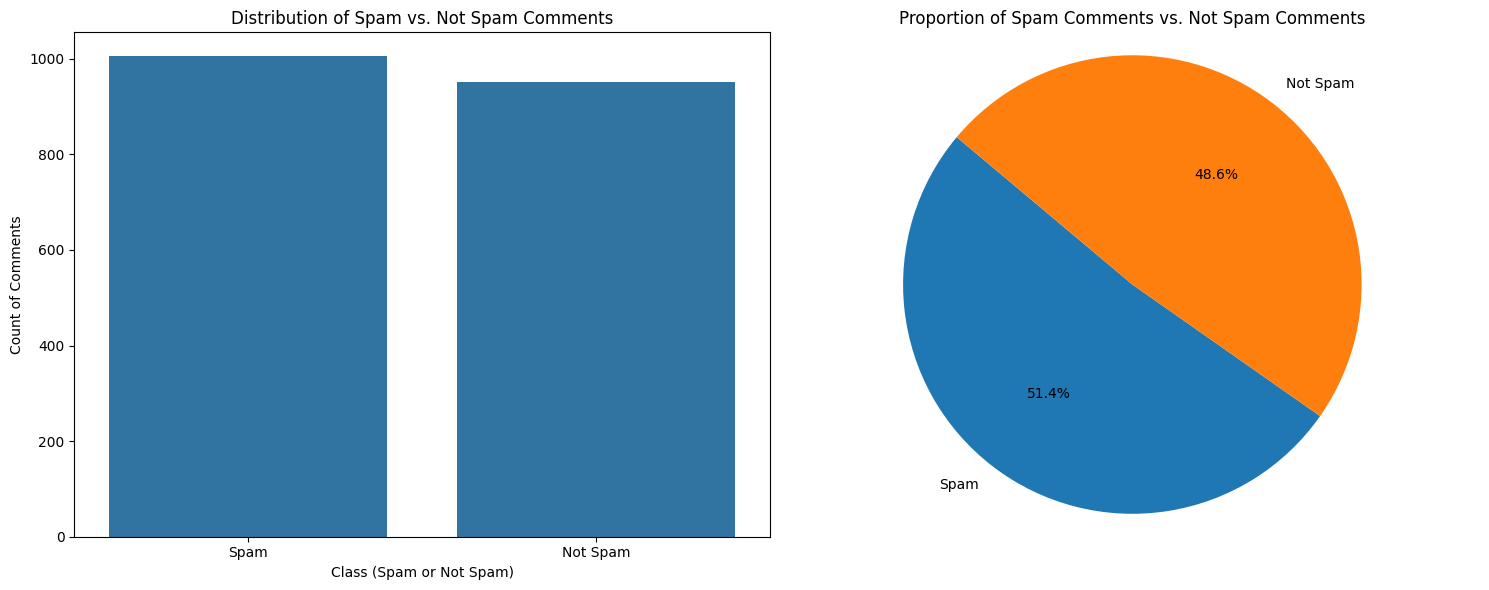

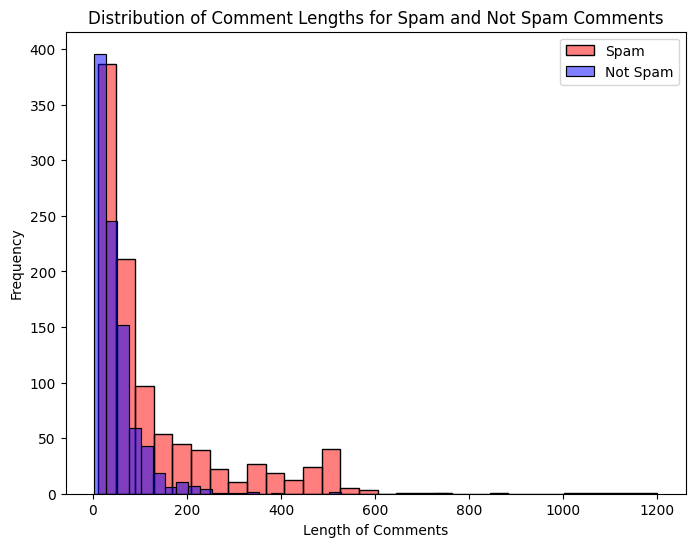

In [28]:
youtube_comments_visualization = Youtube_Comments_Visualization(youtube_comments_df)
youtube_comments_visualization.spam_vs_notspam() # Bar Plot and Pie Chart for Spam and Not Spam Comments
youtube_comments_visualization.comment_length_histogram() # Histogram for length of Spam and Not Spam Comments

**Preprocessing the Modified Data (Removing Stopwords, Punctuations)**

In [29]:
class YouTube_Comments_TextPreProcessor:
  def __init__(self):
    self.stop_words = set(stopwords.words('english'))

  def preprocess_dataframe(self, dataframe, text_column):
    dataframe_copy = dataframe.copy() # Creating a copy of the 'Modified' DataFrame
    dataframe_copy[text_column] = dataframe_copy[text_column].apply(self.preprocess_text)
    return dataframe_copy

  def preprocess_text(self, text):
    tokens = word_tokenize(text.lower())  # Converting th text in lower case
    tokens = [word for word in tokens if word not in self.stop_words and word not in string.punctuation] # Removing stopwords and punctuations

    # Since emoticons are a common part of Youtube Comments, I have not removed it. If they have to be removed, the below 2 lines can be uncommented
    #emoticons = set([':-)', ':)', ';-)', ';)', ':(', ':-(', ':D', ':P', ':O', ':-O', '<3', '^_^']) # Add more common emoticons if needed
    #tokens = [token for token in tokens if token not in emoticons]

    return ' '.join(tokens)

**Checking to see if Data is PreProcessed correctly**

In [30]:
# Creating an instance of the 'YouTube_Comments_TextPreProcessor' class
youtube_comments_textpreprocessor = YouTube_Comments_TextPreProcessor()

preprocessed_df = youtube_comments_textpreprocessor.preprocess_dataframe(youtube_comments_df, 'CONTENT')
preprocess_youtube_comments_analyzer = Youtube_Comments_Analyzer(preprocessed_df) # Creating an instance of the 'Youtube_Comments_Analyzer' class with the new preprocess DataFrame

# Checking if the Data is PreProcessed correctly
preprocess_youtube_comments_analyzer.print_dataframe_head("PreProcessed")
preprocess_youtube_comments_analyzer.print_dataframe_tail("PreProcessed")


The first 5 element of the PreProcessed DataFrame are as follows:


,CONTENT,CLASS
0,huh anyway check tube channel kobyoshi02,Spam
1,hey guys check new channel first vid us monkeys 'm monkey white shirt please leave like comment please subscribe,Spam
2,test say murdev.com,Spam
3,shaking sexy ass channel enjoy ^_^ ﻿,Spam
4,watch v=vtarggvgtwq check .﻿,Spam



The last 5 element of the PreProcessed DataFrame are as follows:


,CONTENT,CLASS
1951,love song sing camp time,Not Spam
1952,love song two reasons 1.it africa 2.i born beautiful south africa,Not Spam
1953,wow,Not Spam
1954,shakira u wiredo,Not Spam
1955,shakira best dancer,Not Spam


**Training the Models (SVM, Random Forest, Multinomial Naive Bayes, Bernoulli Naive Bayes and Logistic Regression) and Evaulating These**

In [31]:
class YouTube_Comments_SpamClassifier:
  def __init__(self, preprocessed_dataframe, text_column, class_column):
    self.df = preprocessed_dataframe
    self.text_column = text_column
    self.class_column = class_column
    self.X_train, self.X_test, self.y_train, self.y_test = self._prepare_data()

  # Splitting the Data into Training and Testing for the 'Preprocessed' DataFrame
  def _prepare_data(self):
    X = self.df[self.text_column]
    y = self.df[self.class_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

  # Creating a Scikit-learn pipeline with CountVectorizer, TfidfTransformer, and the specified classifier.
  def _create_pipeline(self, classifier):
    return Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', classifier),
    ])

  # Training the specified classifier using the training data.
  def _train_model(self, classifier):
    pipeline = self._create_pipeline(classifier)
    pipeline.fit(self.X_train, self.y_train)
    return pipeline

  # Evaluating the performance of the trained model on the test data.
  def _evaluate_model(self, pipeline):
    y_pred = pipeline.predict(self.X_test)
    accuracy = accuracy_score(self.y_test, y_pred)
    report = classification_report(self.y_test, y_pred)
    return accuracy, report

  # Displaying the results of this training for each of the 5 models
  def train_and_evaluate_models(self):
    models = {
        'SVM': SVC(kernel='linear'),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Multinomial Naive Bayes': MultinomialNB(),
        'Bernoulli Naive Bayes': BernoulliNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000)
    }
    trained_models = {}
    evaluation_results = {}
    for model_name, model in models.items():
        pipeline = self._train_model(model)
        trained_models[model_name] = pipeline
        accuracy, report = self._evaluate_model(pipeline)
        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy}")
        print("Classification Report:")
        print(report)
        print("----------------------------------------------------")
        evaluation_results[model_name] = {'accuracy': accuracy, 'classification_report': report}
    return trained_models, evaluation_results

  # Predicting whether the entered text is 'Spam' or 'Not Spam'
  def predict(self, text, trained_models):
    predictions = {}
    for model_name, pipeline in trained_models.items():
        prediction = pipeline.predict([text])[0]
        predictions[model_name] = prediction
        print(f"Model: {model_name}, Prediction: {prediction}")
    return predictions

  # Getting the feature matrix X and target vector y.
  def get_X_y(self):
    return self.X_train, self.X_test, self.y_train, self.y_test

**Result for Each of the Machine Learning Algorithms Applied**

In [32]:
# Create an instance of the 'YouTube_Comments_SpamClassifier' class
yt_spam_classifier = YouTube_Comments_SpamClassifier(preprocessed_df, 'CONTENT', 'CLASS')
X_train, X_test, y_train, y_test = yt_spam_classifier.get_X_y() # Getting the Matrix X and target vector y

# Displaying the Training and Testing Data Specifications
print("Shape of feature matrix (X):", X_test.shape)
print("Shape of target vector (y):", y_test.shape)
print("Size of training set:", X_train.shape[0])
print("Size of testing set:", X_test.shape[0])

trained_models, evaluation_results = yt_spam_classifier.train_and_evaluate_models() # Accessing the trained models and evaulation results

Shape of feature matrix (X): (392,)
Shape of target vector (y): (392,)
Size of training set: 1564
Size of testing set: 392
Model: SVM
Accuracy: 0.9566326530612245
Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.94      0.97      0.95       176
        Spam       0.97      0.95      0.96       216

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392

----------------------------------------------------
Model: Random Forest
Accuracy: 0.951530612244898
Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.93      0.96      0.95       176
        Spam       0.97      0.94      0.96       216

    accuracy                           0.95       392
   macro avg       0.95      0.95      0.95       392
weighted avg       0.95      0.95      0.95       392

-----------------------------------

**Testing for some input texts, the output for each of the Algorithms**

In [33]:
sample_inputs = ["Hi there, I am Shakira!! I am G.O.A.T!!", "Lack of information!",
                 "Get rich quick! Earn thousands of dollars from home with no effort! Click here now!",
                 "I really enjoyed this video! Thanks for sharing such useful information."]

for input_text in sample_inputs:
  print(f'\nFor the input text : "{input_text}"')
  predictions = yt_spam_classifier.predict(input_text, trained_models)


For the input text : "Hi there, I am Shakira!! I am G.O.A.T!!"
Model: SVM, Prediction: Not Spam
Model: Random Forest, Prediction: Not Spam
Model: Multinomial Naive Bayes, Prediction: Not Spam
Model: Bernoulli Naive Bayes, Prediction: Not Spam
Model: Logistic Regression, Prediction: Not Spam

For the input text : "Lack of information!"
Model: SVM, Prediction: Not Spam
Model: Random Forest, Prediction: Not Spam
Model: Multinomial Naive Bayes, Prediction: Spam
Model: Bernoulli Naive Bayes, Prediction: Not Spam
Model: Logistic Regression, Prediction: Not Spam

For the input text : "Get rich quick! Earn thousands of dollars from home with no effort! Click here now!"
Model: SVM, Prediction: Spam
Model: Random Forest, Prediction: Spam
Model: Multinomial Naive Bayes, Prediction: Spam
Model: Bernoulli Naive Bayes, Prediction: Spam
Model: Logistic Regression, Prediction: Not Spam

For the input text : "I really enjoyed this video! Thanks for sharing such useful information."
Model: SVM, Predict

*The input text "Get rich quick! Earn thousands of dollars from home with no effort! Click here now!" is actually a SPAM message. However, Logistic Regression predicts this text as "Not Spam"*

**Utilizing the Above Accuracies to Plot the Visualizations for all the Algorithms**

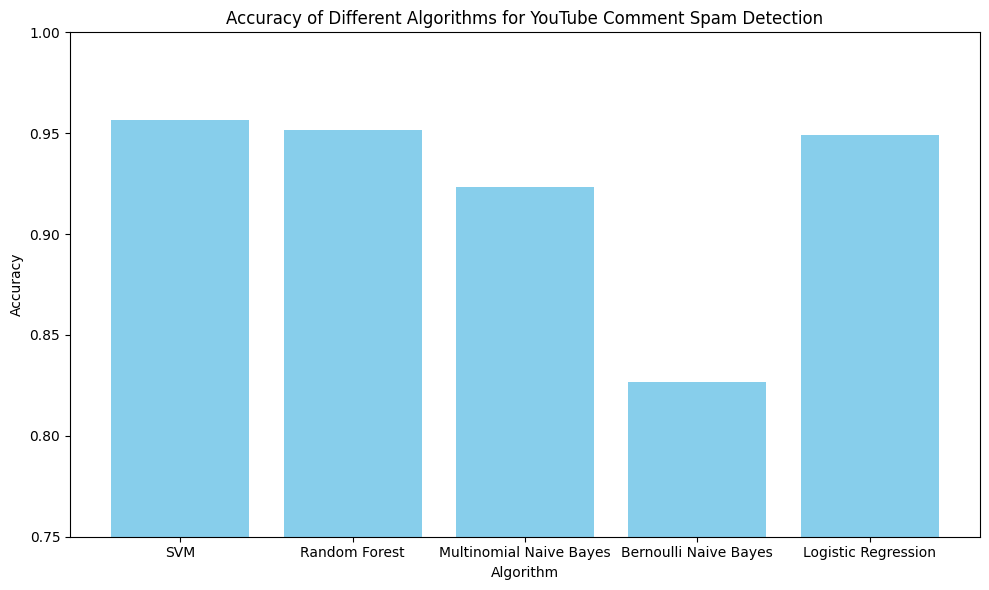

In [34]:
def Statistics_Plot():
  # Accuracy results from each model
  accuracy_results = {
      'SVM': 0.9566326530612245,
      'Random Forest': 0.951530612244898,
      'Multinomial Naive Bayes': 0.923469387755102,
      'Bernoulli Naive Bayes': 0.826530612244898,
      'Logistic Regression': 0.9489795918367347
  }

  # Creating a bar plot
  plt.figure(figsize=(10, 6))
  plt.bar(accuracy_results.keys(), accuracy_results.values(), color='skyblue')

  # Adding labels and title
  plt.xlabel('Algorithm')
  plt.ylabel('Accuracy')
  plt.title('Accuracy of Different Algorithms for YouTube Comment Spam Detection')

  # Showing plot
  plt.ylim(0.75, 1.0)
  plt.tight_layout()
  plt.show()

# Calling the function to display the Plot
Statistics_Plot()

**Visualizing the Confusion Matrix and Cross-Validation Scores for Each Algorithms**

In [35]:
class Youtube_ModelEvaluator:
  def __init__(self, trained_models, X, y):
    self.trained_models = trained_models
    self.X = X
    self.y = y

  # Displaying the Confusion Matrix for all the 5 trained Algorithms
  def visualize_confusion_matrix(self):
    for model_name, pipeline in self.trained_models.items():
      y_pred = pipeline.predict(self.X)
      cm = confusion_matrix(self.y, y_pred)
      plt.figure(figsize=(6, 4))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title(f'Confusion Matrix for {model_name}')
      plt.xlabel('Predicted')
      plt.ylabel('True')
      plt.show()

  def visualize_cross_validation_scores(self):
    for model_name, pipeline in self.trained_models.items():
      # Use stratified k-fold cross-validation for SVM and Logistic Regression
      if 'SVM' in model_name or 'Logistic Regression' in model_name:
        cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

      # Use time-series cross-validation for other models
      else:
        cv_strategy = TimeSeriesSplit(n_splits=5)

      scores = cross_val_score(pipeline, self.X, self.y, cv=cv_strategy)
      print(f'Cross-validation scores for {model_name}: {scores}')
      print(f'Mean Accuracy: {scores.mean()}, Standard Deviation: {scores.std()}')
      print("----------------------------------------------------")

**Creating an instance for the Visualization of Each of these Algorithms**

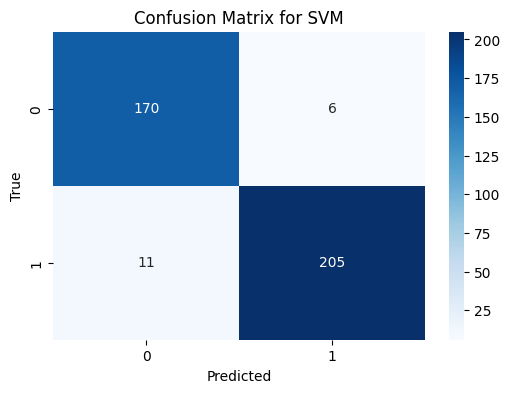

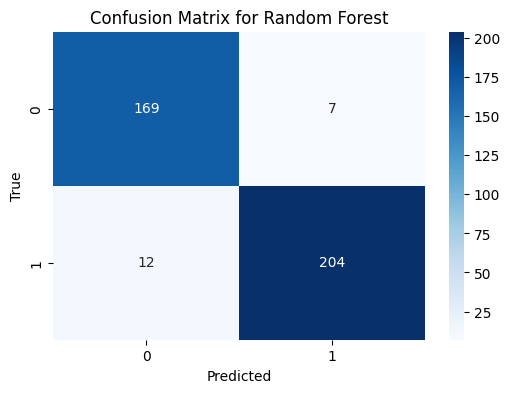

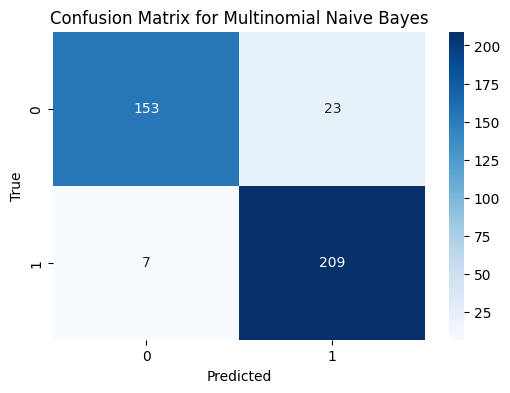

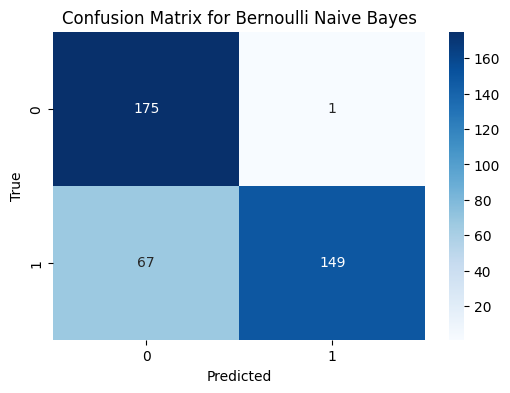

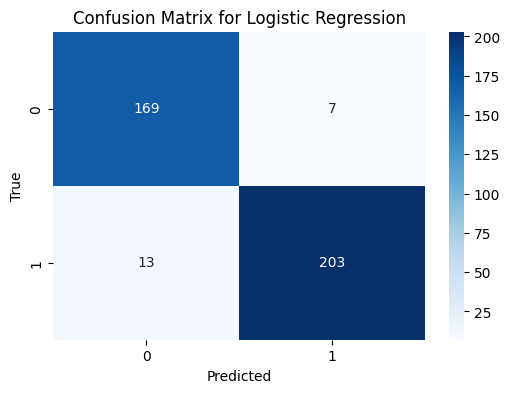

Cross-validation scores for SVM: [0.93670886 0.93670886 0.93589744 0.92307692 0.94871795]
Mean Accuracy: 0.936222005842259, Standard Deviation: 0.008118142525602558
----------------------------------------------------
Cross-validation scores for Random Forest: [0.78461538 0.86153846 0.89230769 0.93846154 0.92307692]
Mean Accuracy: 0.8800000000000001, Standard Deviation: 0.054523215835905706
----------------------------------------------------
Cross-validation scores for Multinomial Naive Bayes: [0.75384615 0.87692308 0.78461538 0.83076923 0.76923077]
Mean Accuracy: 0.803076923076923, Standard Deviation: 0.04501150411793167
----------------------------------------------------
Cross-validation scores for Bernoulli Naive Bayes: [0.8        0.86153846 0.90769231 0.87692308 0.90769231]
Mean Accuracy: 0.8707692307692309, Standard Deviation: 0.03964338069761575
----------------------------------------------------
Cross-validation scores for Logistic Regression: [0.93670886 0.91139241 0.923076

In [36]:
yt_model_evaluator = Youtube_ModelEvaluator(trained_models, X_test, y_test) # Creating instance of the above class

# Displaying the 'Confusion' Matrix and 'Cross-Validation' Scores for each of the 5 trained Algorithms
yt_model_evaluator.visualize_confusion_matrix()
yt_model_evaluator.visualize_cross_validation_scores()